In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

In [2]:
def generateODE(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    A1=0.001000009302753984
    g1=1.0000000012073436
    A2= 0.001
    g2= 1.4300000002543005
    kb=2.9999999991968114
    b=0.19000000134239053
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    f=3.33*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B 
    dm10=(Gl*m00)
    dm01=(Gw*m00)
    dm11=(Gl*m10)+(Gw*m01)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(ρc/ρl)*Vc

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,600)
num_points_0=600
initialConditions = [0, 0, 0, 0,0.6213]
sol = solve_ivp(
    lambda t,m: generateODE(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points_0)
)

Text(0, 0.5, 'Concentration')

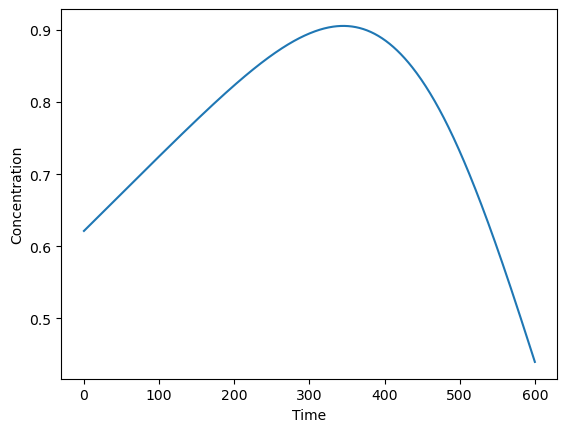

In [3]:
plt.plot(sol.t,sol.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")

Text(0, 0.5, '0,0 Moment')

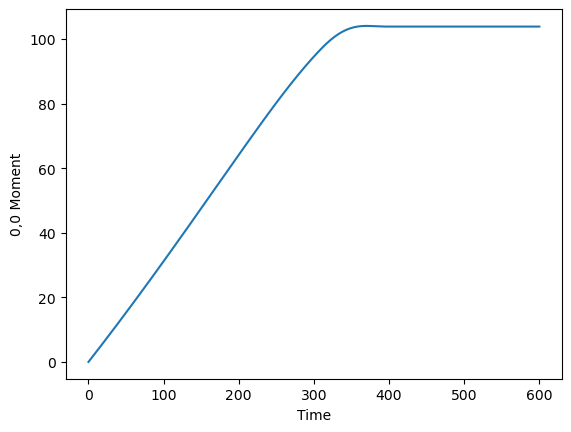

In [9]:
plt.plot(sol.t,sol.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")

In [10]:
def generateODE1(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    A1=0.001000009302753984
    g1=1.0000000012073436
    A2= 0.001
    g2= 1.4300000002543005
    kb=2.9999999991968114
    b=0.19000000134239053
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    
    f=1.66*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B - (m00/tau)
    dm10=(Gl*m00)-(m10/tau)
    dm01=(Gw*m00)-(m01/tau)
    dm11=(Gl*m10)+(Gw*m01)-(m11/tau)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(c/tau)-(ρc/ρl)*Vc

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,11400)
num_points=11400
initialConditions = [0, 0, 0, 0,0.6213]
sol1 = solve_ivp(
    lambda t,m: generateODE1(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)

Text(0, 0.5, 'Concentration')

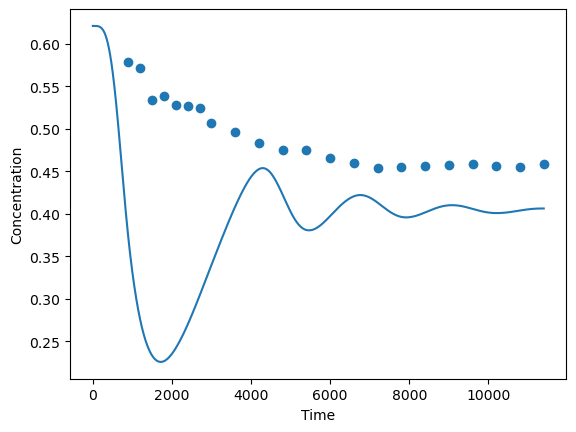

In [11]:
Time = np.array([900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800,11400])
Concentration = np.array([0.578566855,0.571822728,0.534651156,0.538397726,0.52877613,0.527454823,0.524766233,0.506507457,0.496096529,0.483169536,0.474988175,0.474989016,0.466392069,0.459852499,0.4541979,0.455290747,0.456516051,0.458105913,0.458759685,0.456265564,0.455226078,0.458186968])
plt.scatter(Time,Concentration)
plt.plot(sol1.t,sol1.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")

Text(0, 0.5, '0,0 Moment')

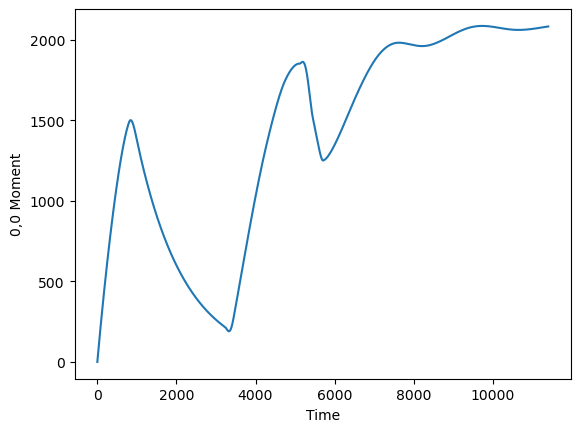

In [12]:
plt.plot(sol1.t,sol1.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")

Text(0, 0.5, '0,0 Moment')

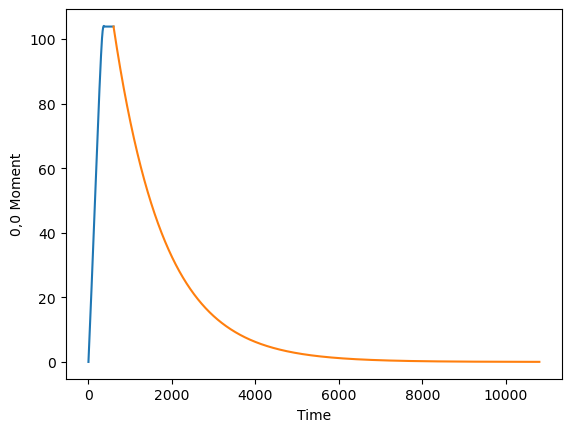

In [42]:
plt.plot(sol.t,sol.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")
plt.plot(sol1.t,sol1.y[0])
plt.xlabel("Time")
plt.ylabel("0,0 Moment")

Text(0, 0.5, 'Concentration')

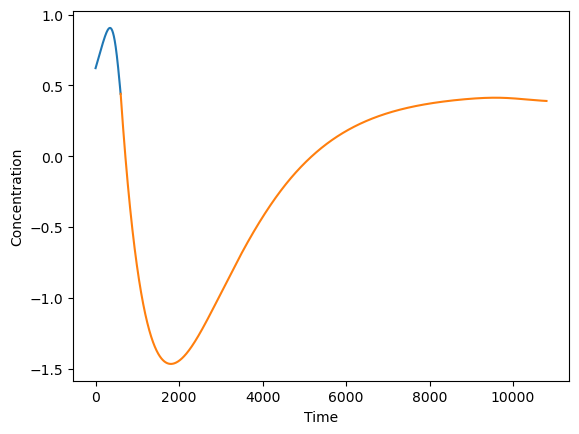

In [6]:
plt.plot(sol.t,sol.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.plot(sol1.t,sol1.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")

In [3]:
Concentration=[0.578566855,0.571822728,0.534651156,0.538397726,0.52877613,0.527454823,0.524766233,0.506507457,0.496096529,0.483169536,0.474988175,0.474989016,0.466392069,0.459852499,0.4541979,0.455290747,0.456516051,0.458105913,0.458759685,0.456265564,0.455226078,0.458186968]

In [4]:
len(Concentration)

22

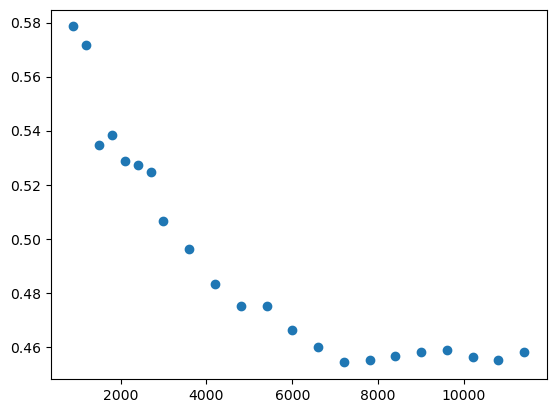

In [5]:
Time = np.array([900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800,11400])
Concentration1 = np.array([0.5785668553, 0.5718227281, 0.5346511564, 0.5383977257,0.5287761302, 0.5274548227, 0.5247662327, 0.5065074574,0.4960965293, 0.4831695362, 0.4749881753, 0.4749890157,0.4663920691, 0.4615271256, 0.4610598822, 0.4526762804,0.4584432018, 0.4475574215, 0.4476696043, 0.4428611391,0.4450958729])
Concentration = np.array([0.578566855,0.571822728,0.534651156,0.538397726,0.52877613,0.527454823,0.524766233,0.506507457,0.496096529,0.483169536,0.474988175,0.474989016,0.466392069,0.459852499,0.4541979,0.455290747,0.456516051,0.458105913,0.458759685,0.456265564,0.455226078,0.458186968])
plt.scatter(Time,Concentration)

Optimized Parameters:
A1: -0.0031630100016995077
g1: 2.576299479675044
A2: 0.0066015228101676095
g2: 1.8134289154264285
kb: 0.5880884339830161
b: 1.9381484947778858


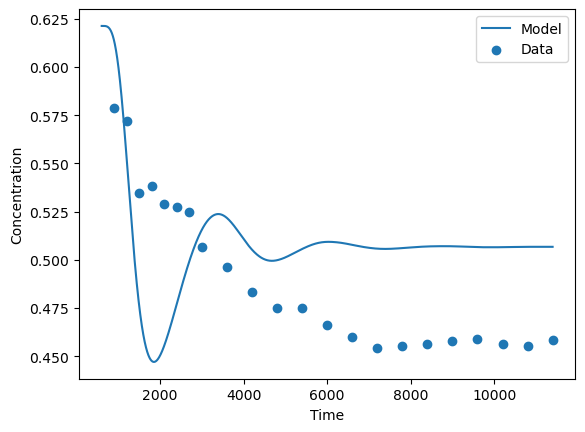

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Given data
Time = np.array([900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800,11400])
Concentration = np.array([0.578566855,0.571822728,0.534651156,0.538397726,0.52877613,0.527454823,0.524766233,0.506507457,0.496096529,0.483169536,0.474988175,0.474989016,0.466392069,0.459852499,0.4541979,0.455290747,0.456516051,0.458105913,0.458759685,0.456265564,0.455226078,0.458186968])

def generateODE3(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    f = 3.33 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc

    return [dm00, dm10, dm01, dm11, dc]

def objective(params):
    A1, g1, A2, g2, kb, b = params
    V = 0.0002  # Volume, adjust as needed
    t_span = (600, 11400)  # Adjust this to match the maximum time in your data
    num_points = 11400
    initialConditions = [0, 0, 0, 0, 0.6213]
    sol = solve_ivp(
        lambda t, m: generateODE3(t, m, A1, g1, A2, g2, kb, b, V),
        t_span,
        initialConditions,
        t_eval=np.linspace(t_span[0], t_span[1], num_points)
    )
    
    # Ensure that the interpolation is within the range of the solution
    interp_t = np.clip(Time, sol.t[0], sol.t[-1])
    
    # Interpolate the solution at the time points specified in Time
    interp_solution = interp1d(sol.t, sol.y[4])
    model_predictions = interp_solution(interp_t)
    error = np.sum((model_predictions - Concentration)**2)  # Sum of squared differences
    return error

# Initial guess for parameters
initial_guess = [-0.014342860707675983, 1.2690554935379228, 0.004187063025147569, 0.5855225254504802, 0.8751428133626444, 0.9797918410545488]

# Minimize the objective function
result = minimize(objective, initial_guess, method='COBYLA')

# Extract the optimized parameters
A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt = result.x

print("Optimized Parameters:")
print("A1:", A1_opt)
print("g1:", g1_opt)
print("A2:", A2_opt)
print("g2:", g2_opt)
print("kb:", kb_opt)
print("b:", b_opt)

# Plot the optimized model against the data
t_span = (600, 11400)
num_points = 11400
initialConditions = [0, 0, 0, 0, 0.6213]
sol = solve_ivp(
    lambda t, m: generateODE3(t, m, A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt, 0.0002),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)
plt.plot(sol.t, sol.y[4], label='Model')
plt.scatter(Time, Concentration, label='Data')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

Optimized Parameters:
A1: 0.01
g1: 1.2687384641395458
A2: 0.004192086924602089
g2: 0.5850164806904999
kb: 0.8753426731178646
b: 0.9795993592840072


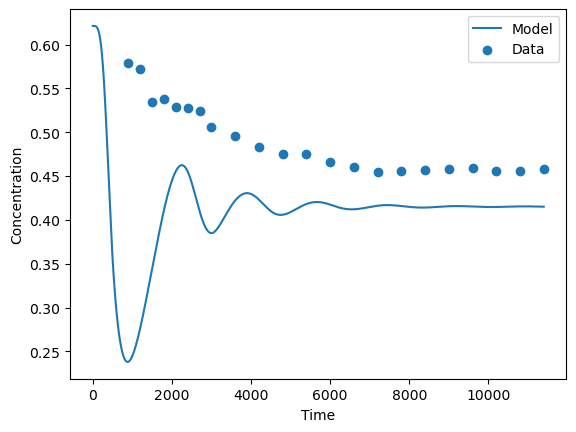

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Given data
Time = np.array([900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800,11400])
Concentration = np.array([0.578566855,0.571822728,0.534651156,0.538397726,0.52877613,0.527454823,0.524766233,0.506507457,0.496096529,0.483169536,0.474988175,0.474989016,0.466392069,0.459852499,0.4541979,0.455290747,0.456516051,0.458105913,0.458759685,0.456265564,0.455226078,0.458186968])

def generateODE3(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    f = 3.33 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc

    return [dm00, dm10, dm01, dm11, dc]

def objective(params):
    A1, g1, A2, g2, kb, b = params
    V = 0.0002  # Volume, adjust as needed
    t_span = (600, 11400)  # Adjust this to match the maximum time in your data
    num_points = 11400
    initialConditions = [0, 0, 0, 0, 0.6213]
    sol = solve_ivp(
        lambda t, m: generateODE3(t, m, A1, g1, A2, g2, kb, b, V),
        t_span,
        initialConditions,
        t_eval=np.linspace(t_span[0], t_span[1], num_points)
    )
    
    # Ensure that the interpolation is within the range of the solution
    interp_t = np.clip(Time, sol.t[0], sol.t[-1])
    
    # Interpolate the solution at the time points specified in Time
    interp_solution = interp1d(sol.t, sol.y[4])
    model_predictions = interp_solution(interp_t)
    error = np.sum((model_predictions - Concentration)**2)  # Sum of squared differences
    return error

# Initial guess for parameters
initial_guess = [-0.014342860707675983, 1.2690554935379228, 0.004187063025147569, 0.5855225254504802, 0.8751428133626444, 0.9797918410545488]

# Bounds for the parameters
bounds = [(0.01, 0.1),   # A1
          (0.5, 2),      # g1
          (0, 0.01),     # A2
          (0, 1),        # g2
          (0, 2),        # kb
          (0, 2)]        # b

# Minimize the objective function with bounds
result = minimize(objective, initial_guess, method='L-BFGS-B', bounds=bounds)

# Extract the optimized parameters
A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt = result.x

print("Optimized Parameters:")
print("A1:", A1_opt)
print("g1:", g1_opt)
print("A2:", A2_opt)
print("g2:", g2_opt)
print("kb:", kb_opt)
print("b:", b_opt)

# Plot the optimized model against the data
t_span = (0, 11400)
num_points = 11400
initialConditions = [0, 0, 0, 0, 0.6213]
sol = solve_ivp(
    lambda t, m: generateODE3(t, m, A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt, 0.0002),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)
plt.plot(sol.t, sol.y[4], label='Model')
plt.scatter(Time, Concentration, label='Data')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

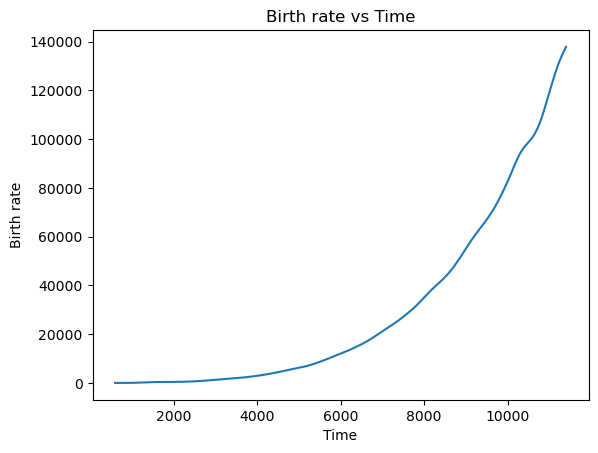

In [13]:
plt.plot(sol.t, kb_opt * ((sol.y[4] - 0.383) / 0.383)**b_opt)
plt.xlabel("Time")
plt.ylabel("Birth rate")
plt.title("Birth rate vs Time")
plt.show()

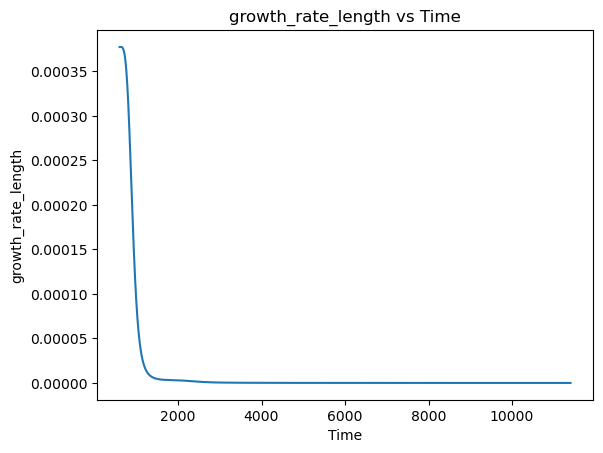

In [14]:
plt.plot(sol.t, -A1_opt * ((sol.y[4] - 0.383) / 0.383)**g1_opt)
plt.xlabel("Time")
plt.ylabel("growth_rate_length")
plt.title("growth_rate_length vs Time")
plt.show()

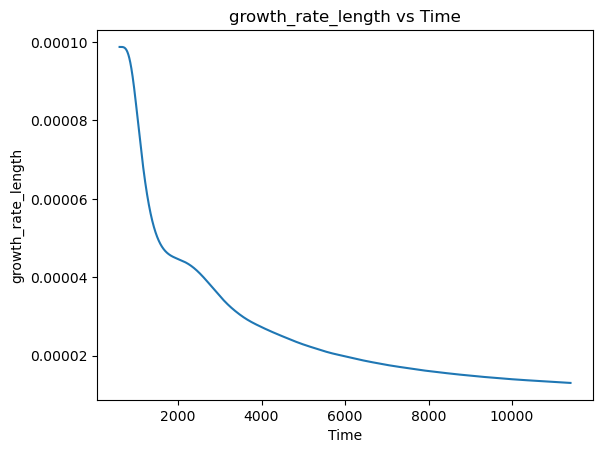

In [10]:
plt.plot(sol.t, A2_opt * ((sol.y[4] - 0.383) / 0.383)**g2_opt)
plt.xlabel("Time")
plt.ylabel("growth_rate_length")
plt.title("growth_rate_length vs Time")
plt.show()

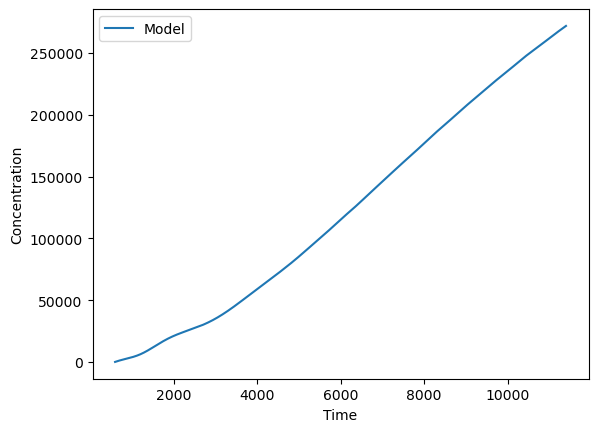

In [11]:
plt.plot(sol.t, sol.y[0], label='Model')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

In [4]:
def generateODE(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    #A1 = 8.83*10**(-5)   # m/s 
    #A2 = 9.15*10**(-5)              # m/s
    #g1 = 0.69
    #g2 = 1.414
    #kb = 161.0103                         # m3/sec
    #b = 0.03565
    #R = 8.314                        # joule\(k mol)
    #T = 303.14                       # kelvin
    #V = 0.0002                       # m3
   
    A1 = -0.05406               # m/s 
    A2 = 0.0002964               # m/s
    g1 = 10.4633
    g2 = 3.0287
    kb = 1.7908                        # m3/sec
    b = -5.8639
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    f=3.33*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B 
    dm10=(Gl*m00)
    dm01=(Gw*m00)
    dm11=(Gl*m10)+(Gw*m01)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(ρc/ρl)*Vc

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,599)
num_points_0=599
initialConditions = [0, 0, 0, 0,0.6215]
sol1 = solve_ivp(
    lambda t,m: generateODE(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points_0)
)

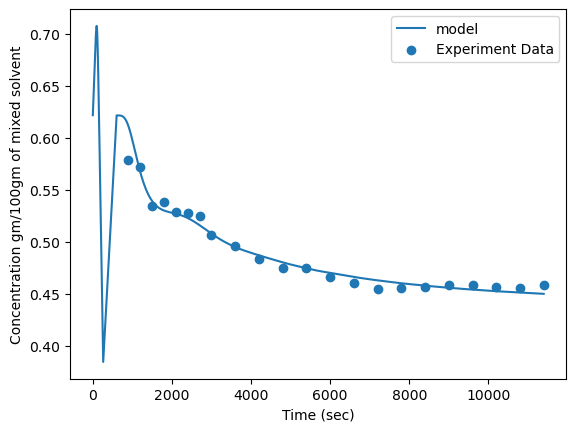

In [6]:
plt.plot(np.append(sol1.t,sol.t),np.append(sol1.y[4], sol.y[4]), label ="model")
plt.scatter(Time, Concentration, label='Experiment Data')
plt.xlabel("Time (sec)")
plt.ylabel("Concentration gm/100gm of mixed solvent")
plt.legend()
plt.show()

Best Parameters: [-0.6232098263695787, 0.10667046180959065, -0.006069195156519203, 0.412849515245162, 1.1204759549296959, -0.0196951550516423]


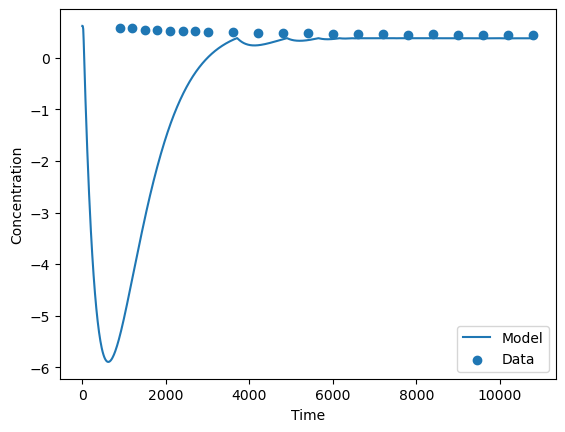

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from deap import base, creator, tools, algorithms

# Given data
Time = np.array([900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800])
Concentration = np.array([0.5785668553, 0.5718227281, 0.5346511564, 0.5383977257,0.5287761302, 0.5274548227, 0.5247662327, 0.5065074574,0.4960965293, 0.4831695362, 0.4749881753, 0.4749890157,0.4663920691, 0.4615271256, 0.4610598822, 0.4526762804,0.4584432018, 0.4475574215, 0.4476696043, 0.4428611391,0.4450958729])

def generateODE3(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    f = 3.33 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    # Handle the case when s is 0
    if s == 0:
        Gl = 0
    else:
        Gl = A1 * (s)**g1
    
    if g2 < 0:
        Gw = 0
    else:
        Gw = A2 * (s)**g2
        
    b = np.abs(b)
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc

    return [dm00, dm10, dm01, dm11, dc]

def evaluate(individual):
    A1, g1, A2, g2, kb, b = individual
    
    # Define parameter bounds
    A1_bounds = (0.00001, 3.0)
    g1_bounds = (0.1, 3.0)
    A2_bounds = (0.00001, 3.0)
    g2_bounds = (0.1, 3.0)
    kb_bounds = (1.0, 3.0)
    b_bounds = (0.0, 3.0)
    
    # Clip parameters to bounds
    A1 = np.clip(A1, *A1_bounds)
    g1 = np.clip(g1, *g1_bounds)
    A2 = np.clip(A2, *A2_bounds)
    g2 = np.clip(g2, *g2_bounds)
    kb = np.clip(kb, *kb_bounds)
    b = np.clip(b, *b_bounds)
    
    V = 0.0002  # Volume, adjust as needed
    t_span = (0, 10800)  # Adjust this to match the maximum time in your data
    num_points = 1000
    initialConditions = [0, 0, 0, 0, 0.6213]
    sol = solve_ivp(
        lambda t, m: generateODE3(t, m, A1, g1, A2, g2, kb, b, V),
        t_span,
        initialConditions,
        t_eval=np.linspace(t_span[0], t_span[1], num_points)
    )
    
    # Ensure that the interpolation is within the range of the solution
    interp_t = np.clip(Time, sol.t[0], sol.t[-1])
    
    # Interpolate the solution at the time points specified in Time
    interp_solution = interp1d(sol.t, sol.y[4])
    model_predictions = interp_solution(interp_t)
    error = np.sum((model_predictions - Concentration)**2)  # Sum of squared differences
    return error,

# Define genetic algorithm parameters
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_float, toolbox.attr_float, toolbox.attr_float,
                  toolbox.attr_float, toolbox.attr_float, toolbox.attr_float),
                 n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Genetic Algorithm parameters
population_size = 30
generations = 20
cxpb, mutpb = 0.5, 0.2

# Create initial population
population = toolbox.population(n=population_size)

# Evaluate the entire population
fitnesses = list(map(toolbox.evaluate, population))
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit

# Evolutionary algorithm loop
for gen in range(generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=cxpb, mutpb=mutpb)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for ind, fit in zip(offspring, fits):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
best_params = best_individual

print("Best Parameters:", best_params)

# Plot the optimized model against the data
A1, g1, A2, g2, kb, b = best_params
t_span = (0, 10800)
num_points = 1000
initialConditions = [0, 0, 0, 0, 0.6213]
sol = solve_ivp(
    lambda t, m: generateODE3(t, m, A1, g1, A2, g2, kb, b, 0.0002),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)
plt.plot(sol.t, sol.y[4], label='Model')
plt.scatter(Time, Concentration, label='Data')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

Optimized Parameters:
A1: -0.05406107753781826
g1: 10.46339438865509
A2: 0.0002964380929752742
g2: 3.028707709668673
kb: 1.7908907949926753
b: -5.863963989962642


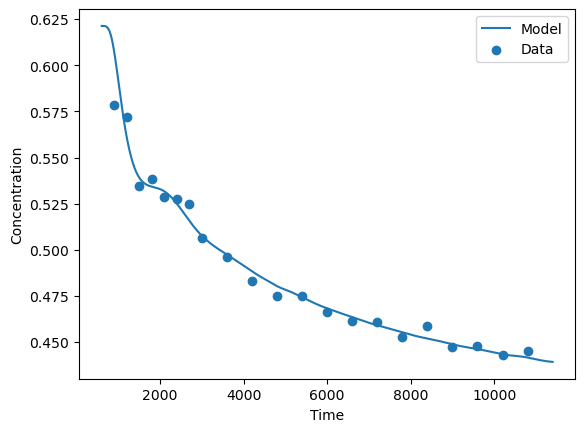

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Given data
Time = np.array([900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800])
Concentration = np.array([0.5785668553, 0.5718227281, 0.5346511564, 0.5383977257,0.5287761302, 0.5274548227, 0.5247662327, 0.5065074574,0.4960965293, 0.4831695362, 0.4749881753, 0.4749890157,0.4663920691, 0.4615271256, 0.4610598822, 0.4526762804,0.4584432018, 0.4475574215, 0.4476696043, 0.4428611391,0.4450958729])

def generateODE3(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    f = 3.33 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc

    return [dm00, dm10, dm01, dm11, dc]

def negative_log_likelihood(params):
    A1, g1, A2, g2, kb, b = params
    V = 0.0002  # Volume, adjust as needed
    t_span = (600, 11400)  # Adjust this to match the maximum time in your data
    num_points = 11400
    initialConditions = [0, 0, 0, 0, 0.6213]
    sol = solve_ivp(
        lambda t, m: generateODE3(t, m, A1, g1, A2, g2, kb, b, V),
        t_span,
        initialConditions,
        t_eval=np.linspace(t_span[0], t_span[1], num_points)
    )
    
    # Ensure that the interpolation is within the range of the solution
    interp_t = np.clip(Time, sol.t[0], sol.t[-1])
    
    # Interpolate the solution at the time points specified in Time
    interp_solution = interp1d(sol.t, sol.y[4])
    model_predictions = interp_solution(interp_t)
    
    # Calculate negative log-likelihood
    sigma = 0.01  # Standard deviation of the error
    nll = 0.5 * np.sum(((model_predictions - Concentration) / sigma)**2 + np.log(2 * np.pi * sigma**2))
    
    return nll

# Initial guess for parameters
initial_guess = [-0.014342860707675983, 1.2690554935379228, 0.004187063025147569, 0.5855225254504802, 0.8751428133626444, 0.9797918410545488]

# Minimize the negative log-likelihood function
result = minimize(negative_log_likelihood, initial_guess, method='Nelder-Mead')

# Extract the optimized parameters
A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt = result.x

print("Optimized Parameters:")
print("A1:", A1_opt)
print("g1:", g1_opt)
print("A2:", A2_opt)
print("g2:", g2_opt)
print("kb:", kb_opt)
print("b:", b_opt)

# Plot the optimized model against the data
t_span = (600, 11400)
num_points = 11400
initialConditions = [0, 0, 0, 0, 0.6213]
sol = solve_ivp(
    lambda t, m: generateODE3(t, m, A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt, 0.0002),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)
plt.plot(sol.t, sol.y[4], label='Model')
plt.scatter(Time, Concentration, label='Data')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()